<a href="https://colab.research.google.com/github/Keerthibalraj/Image_denoising/blob/main/image_denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.3 MB/s eta 0:00:00


In [93]:
!pip install medpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.8/151.8 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 8.8 MB/s eta 0:00:00
  Created wheel for medpy: filename=MedPy-0.4.0-py3-none-any.whl size=214945 sha256=8165fca84f2661df2064ea7cc4dc57cd3f661f974ca5a2fd0a8f241b86cf3690
  Stored in directory: /root/.cache/pip/wheels/d4/32/c7/6380ab2edb8cca018d39a0f1d43250fd9791922c963117de46
Successfully built medpy


In [100]:
!pip install bm3d

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.0 MB/s eta 0:00:00


In [18]:
import matplotlib.pyplot as plt
import pydicom
from skimage import img_as_float
from skimage.metrics import peak_signal_noise_ratio
from matplotlib import pyplot as plt
from skimage import io
from scipy import ndimage as nd
import cv2
import numpy as np
import skimage


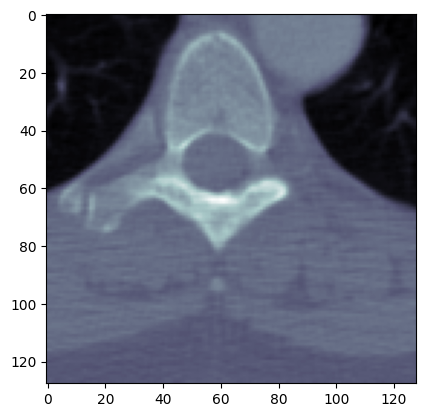

In [8]:
dataset = pydicom.dcmread("/content/drive/MyDrive/IMAGES/input.dcm")
img=dataset.pixel_array
plt.imshow(img, cmap=plt.cm.bone)

Read an image

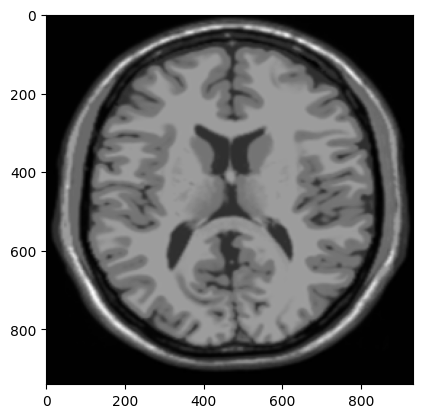

In [47]:
img = img_as_float(io.imread("/content/drive/MyDrive/IMAGES/Input.tif"))
plt.imshow(img, cmap='gray')

Adding noise to image

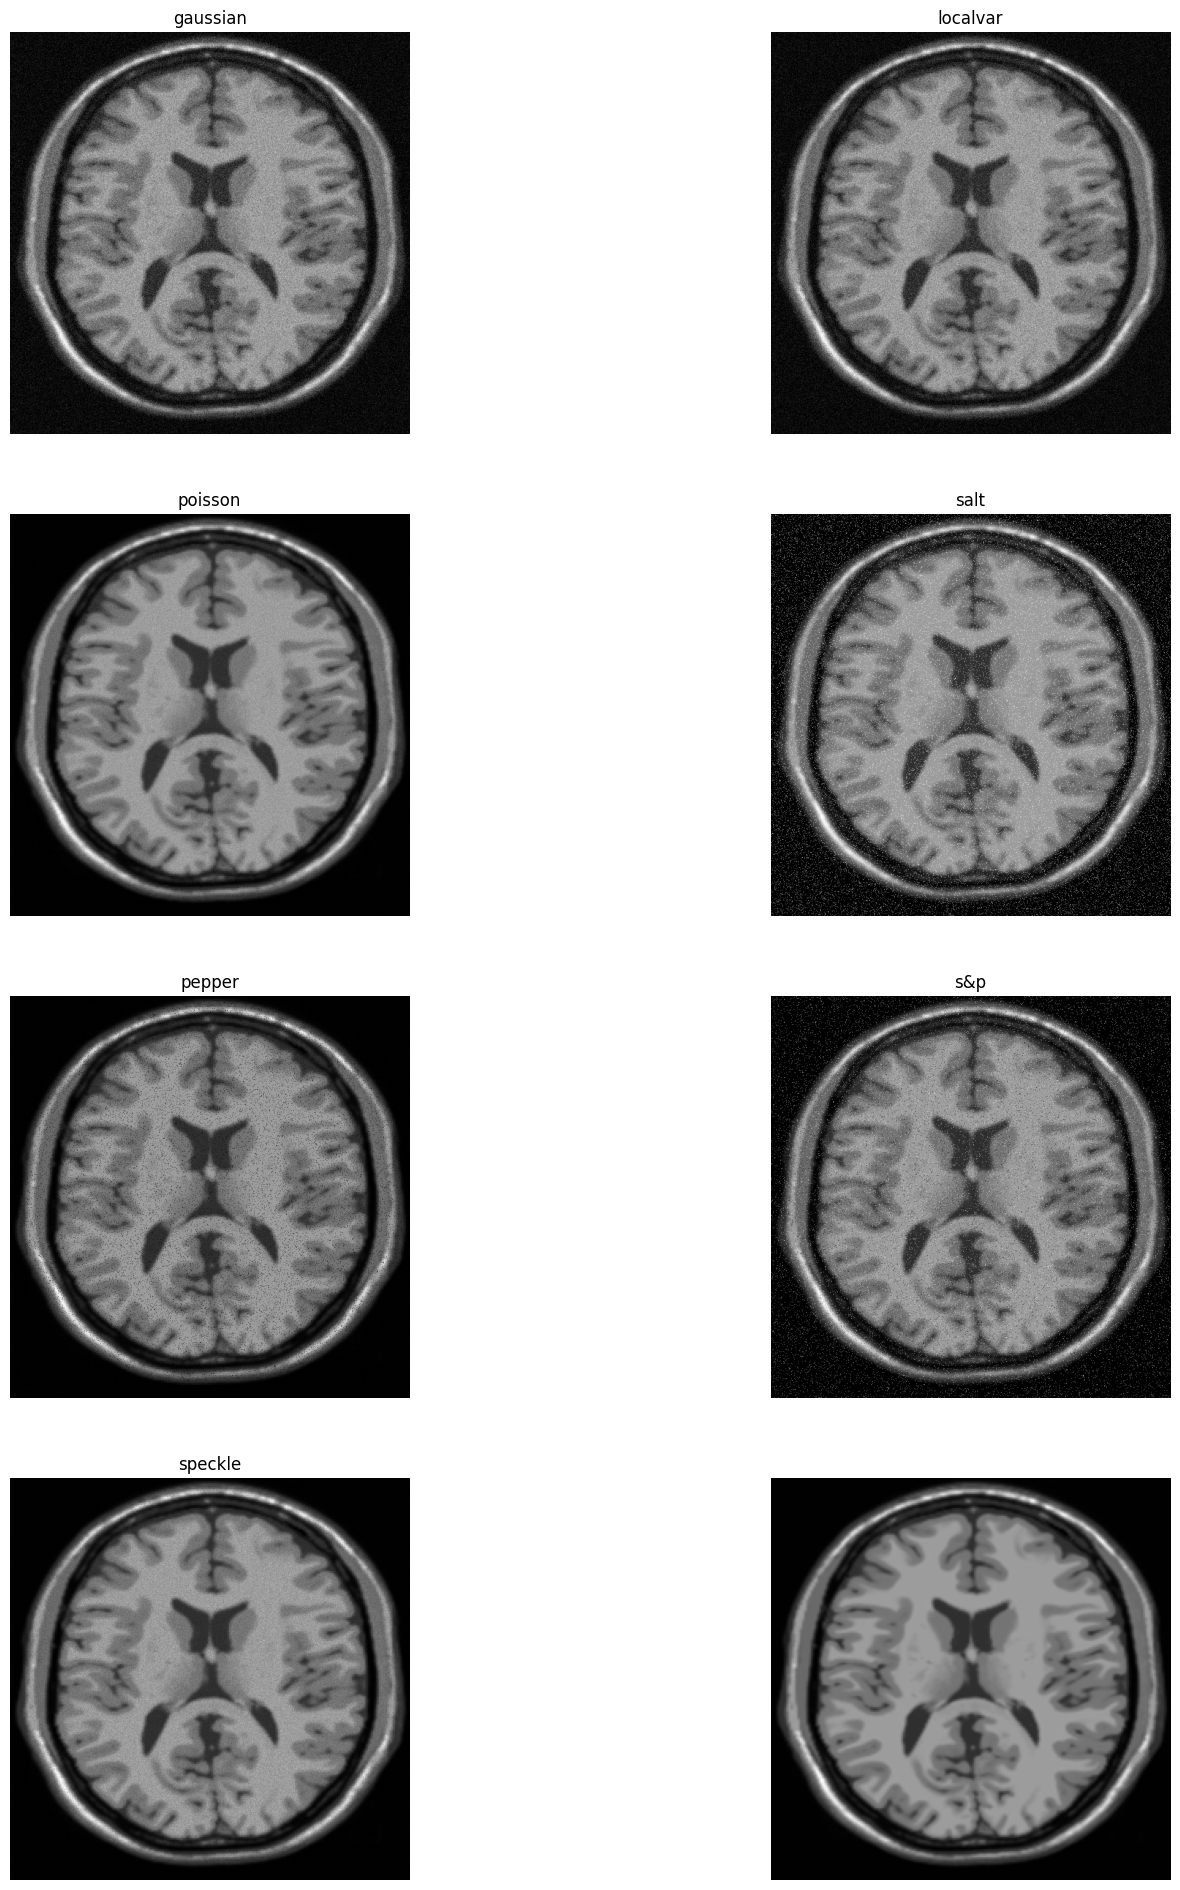

In [28]:
def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg,cmap='gray')

    else:
        plt.imshow(img,cmap='gray')
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img, "gaussian", r,c,1)
plotnoise(img, "localvar", r,c,2)
plotnoise(img, "poisson", r,c,3)
plotnoise(img, "salt", r,c,4)
plotnoise(img, "pepper", r,c,5)
plotnoise(img, "s&p", r,c,6)
plotnoise(img, "speckle", r,c,7)
plotnoise(img, None, r,c,8)
plt.show()

Noisy image

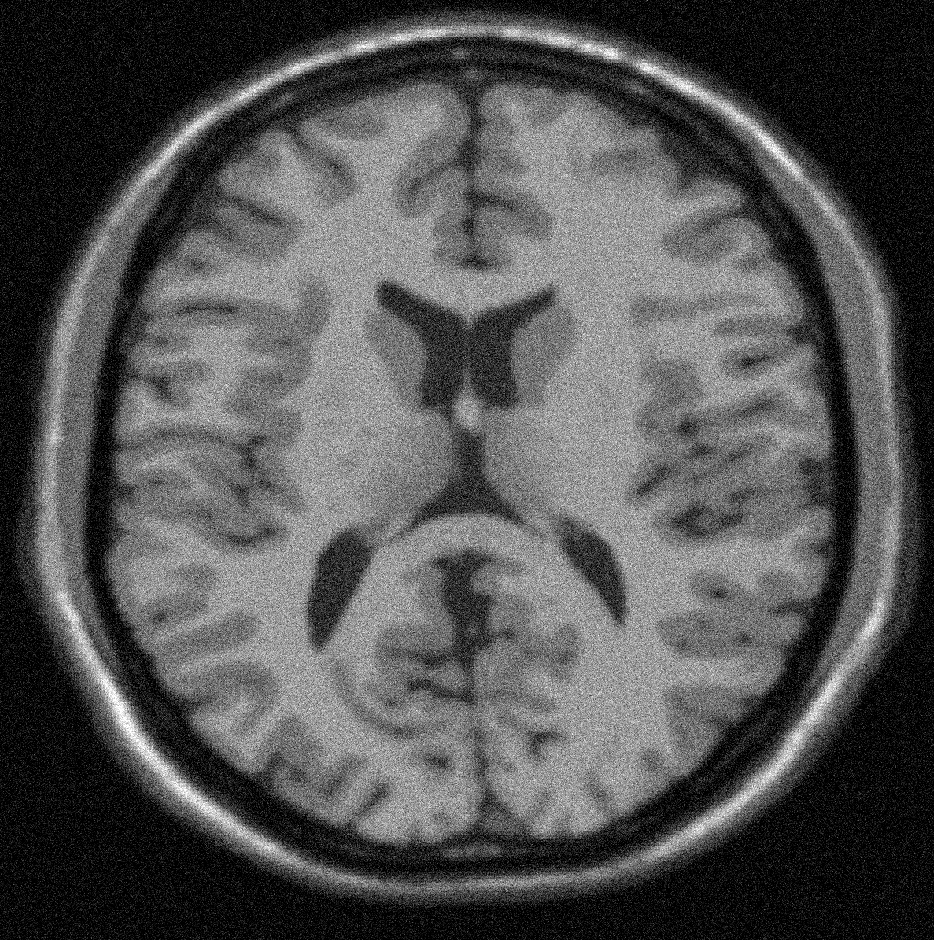

In [69]:
# Add salt-and-pepper noise to the image.
from google.colab.patches import cv2_imshow
noise_img = skimage.util.random_noise(img, mode='gaussian',var=0.1**2)
noise_img = np.array(255*noise_img, dtype = 'float')
cv2.imwrite("/content/drive/MyDrive/IMAGES/noisy.jpg", noise_img )
# Display the noise image
cv2_imshow(noise_img)

Gaussian Filter

True

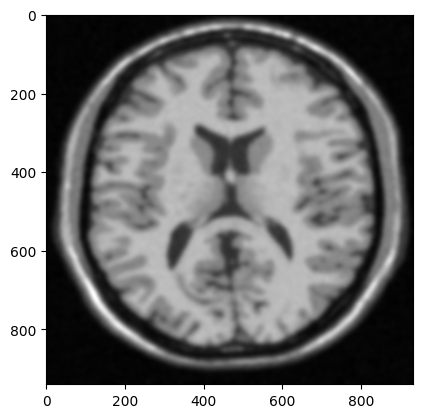

In [71]:
gaussian_img = nd.gaussian_filter(noise_img, sigma=5)
plt.imshow(gaussian_img, cmap='gray')
cv2.imwrite("/content/drive/MyDrive/IMAGES/Guassian_img.jpg", gaussian_img )

Bilateral filter

<ipython-input-78-dd3ccb27b3e1>:4: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  sigma_est = estimate_sigma(noise_img, multichannel=True, average_sigmas=True)
<ipython-input-78-dd3ccb27b3e1>:6: FutureWarning: `multichannel` is a deprecated argument name for `denoise_bilateral`. It will be removed in version 1.0. Please use `channel_axis` instead.
  denoise_bilateral = denoise_bilateral(noise_img, sigma_spatial=3,


True

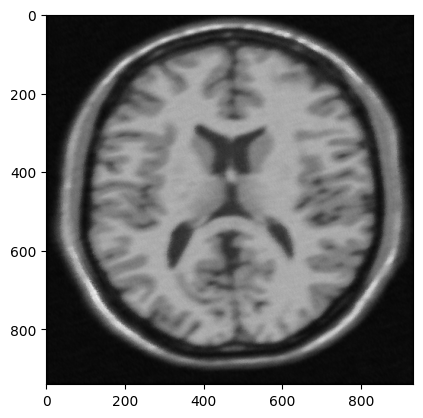

In [78]:
from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)

sigma_est = estimate_sigma(noise_img, multichannel=True, average_sigmas=True)

denoise_bilateral = denoise_bilateral(noise_img, sigma_spatial=3,
                multichannel=False)
plt.imshow(denoise_bilateral, cmap='gray')
cv2.imwrite("/content/drive/MyDrive/IMAGES/bilateral_img.jpg", denoise_bilateral)

TV Filter

<ipython-input-88-ee6ea4f1dc6f>:1: FutureWarning: `multichannel` is a deprecated argument name for `denoise_tv_chambolle`. It will be removed in version 1.0. Please use `channel_axis` instead.
  denoise_TV = denoise_tv_chambolle(noise_img, weight=50, multichannel=False)


True

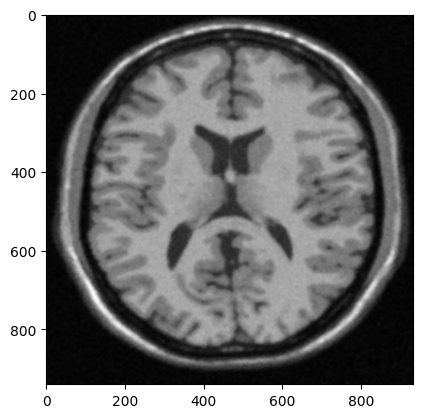

In [88]:
denoise_TV = denoise_tv_chambolle(noise_img, weight=50, multichannel=False)
plt.imshow(denoise_TV, cmap='gray')
cv2.imwrite("/content/drive/MyDrive/IMAGES/TV_img.jpg", denoise_TV)

Wavelet filter

<ipython-input-89-52f89a736ed5>:1: FutureWarning: `multichannel` is a deprecated argument name for `denoise_wavelet`. It will be removed in version 1.0. Please use `channel_axis` instead.
  wavelet_smoothed = denoise_wavelet(noise_img, multichannel=False,


True

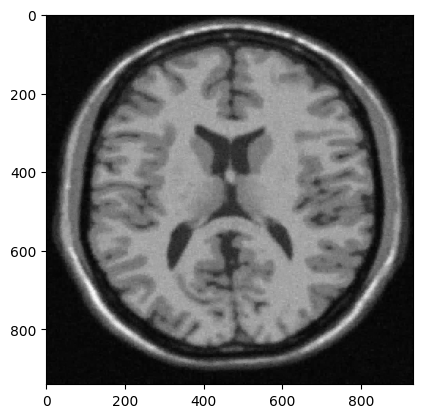

In [89]:
wavelet_smoothed = denoise_wavelet(noise_img, multichannel=False,
                           method='BayesShrink', mode='soft',
                           rescale_sigma=True)
plt.imshow(wavelet_smoothed, cmap='gray')
cv2.imwrite("/content/drive/MyDrive/IMAGES/Wavelet_img.jpg", wavelet_smoothed)

Shifted inv wavelet filter

<ipython-input-91-604a209d0a99>:8: FutureWarning: `multichannel` is a deprecated argument name for `cycle_spin`. It will be removed in version 1.0. Please use `channel_axis` instead.
  Shft_inv_wavelet = cycle_spin(noise_img, func=denoise_wavelet, max_shifts = max_shifts,


True

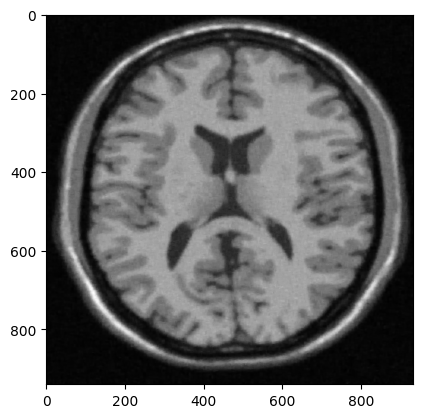

In [91]:
from skimage.restoration import denoise_wavelet, cycle_spin
denoise_kwargs = dict(multichannel=False, wavelet='db1', method='BayesShrink',
                      rescale_sigma=True)

all_psnr = []
max_shifts = 3

Shft_inv_wavelet = cycle_spin(noise_img, func=denoise_wavelet, max_shifts = max_shifts,
                            func_kw=denoise_kwargs, multichannel=False)
plt.imshow(Shft_inv_wavelet, cmap='gray')
cv2.imwrite("/content/drive/MyDrive/IMAGES/Shft_inv_wavelet.jpg", Shft_inv_wavelet)

Anisotropic diffusion filter

True

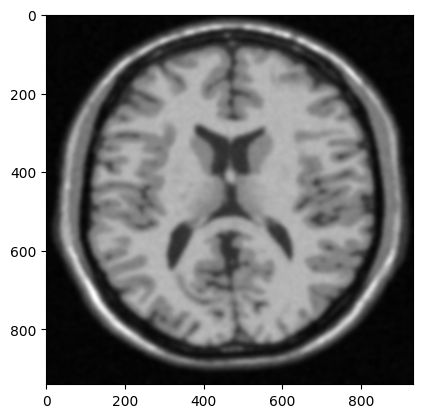

In [95]:
from medpy.filter.smoothing import anisotropic_diffusion
img_aniso_filtered = anisotropic_diffusion(noise_img, niter=50, kappa=50, gamma=0.2, option=2)
plt.imshow(img_aniso_filtered, cmap='gray')
cv2.imwrite("/content/drive/MyDrive/IMAGES/aniso_img.jpg", img_aniso_filtered)

NLM

<ipython-input-97-4553ea58667a>:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  sigma_est = np.mean(estimate_sigma(noise_img, multichannel=False))
<ipython-input-97-4553ea58667a>:5: FutureWarning: `multichannel` is a deprecated argument name for `denoise_nl_means`. It will be removed in version 1.0. Please use `channel_axis` instead.
  NLM_skimg_denoise_img = denoise_nl_means(noise_img, h=1.15 * sigma_est, fast_mode=True,


True

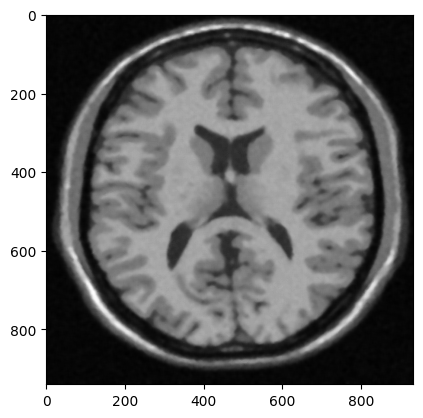

In [97]:
from skimage.restoration import denoise_nl_means, estimate_sigma
sigma_est = np.mean(estimate_sigma(noise_img, multichannel=False))


NLM_skimg_denoise_img = denoise_nl_means(noise_img, h=1.15 * sigma_est, fast_mode=True,
                               patch_size=9, patch_distance=5, multichannel=False)
plt.imshow(NLM_skimg_denoise_img, cmap='gray')
cv2.imwrite("/content/drive/MyDrive/IMAGES/NLM_img.jpg", NLM_skimg_denoise_img)

BM3D

True

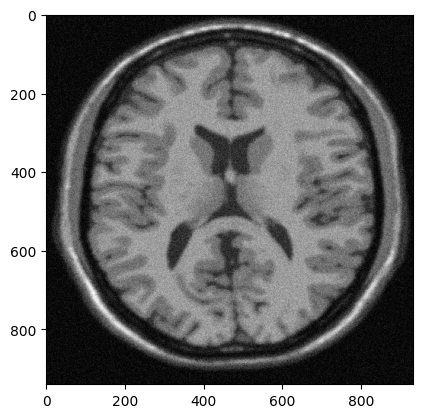

In [102]:
import bm3d
BM3D_denoised_image = bm3d.bm3d(noise_img, sigma_psd=0.2, stage_arg=bm3d.BM3DStages.ALL_STAGES)
plt.imshow(BM3D_denoised_image, cmap='gray')
cv2.imwrite("/content/drive/MyDrive/IMAGES/BM3D_img.jpg", BM3D_denoised_image)